In [7]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import mixture
from sklearn.preprocessing import MinMaxScaler

In [8]:
df = pd.read_csv("Data\\train_data_3sec.csv", header=0)

# Extract features and labels
features = df.iloc[:, 2:-1].values  # Assuming your features start from the second column
labels = df.iloc[:, -1].values

# Convert labels to numeric format if needed
# For example, if labels are strings like 'blues', you can encode them into numbers
unique_labels = np.unique(labels)
label_mapping = {label: i for i, label in enumerate(unique_labels)}
numeric_labels = np.array([label_mapping[label] for label in labels])

# Convert features to a numpy array
features_array = np.array(features, dtype=np.float32)
numeric_labels.shape
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features_array)


In [16]:

selected_features = [2, 3, 6, 12, 13, 14, 15, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 29, 31, 32, 33, 35, 37, 39, 41, 42, 43, 45, 46, 47, 48, 49, 53, 55, 56]
selected_data = normalized_features[:,selected_features]
X = selected_data
y = numeric_labels

In [10]:
g = mixture.GaussianMixture(n_components=10)
g.fit(selected_data)



GaussianMixture(n_components=10)

In [5]:
class_centers = {label: np.mean(X[y == label], axis=0) for label in set(y)}

# Initialize GMM parameters
n_components = len(set(y))  # Number of components equals the number of classes
means_init = [class_centers[label] for label in range(n_components)]
covariances_init = [np.cov(X[y == label], rowvar=False) for label in range(n_components)]
weights_init = [np.sum(y == label) / len(y) for label in range(n_components)]

# Fit the GMM
gmm = GaussianMixture(n_components=n_components, means_init=means_init, weights_init=weights_init)
gmm.fit(X)

NameError: name 'y' is not defined

In [17]:
# how well does this fit our labels?
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score, fowlkes_mallows_score
gmm = g
# Assuming gmm is your trained GaussianMixture model
predicted_labels = gmm.predict(X)

# Calculate Adjusted Rand Index
ari = adjusted_rand_score(y, predicted_labels)

print(f"Adjusted Rand Index: {ari}")


# Calculate Normalized Mutual Information
nmi = normalized_mutual_info_score(y, predicted_labels)

# Calculate Fowlkes-Mallows Index
fmi = fowlkes_mallows_score(y, predicted_labels)

print(f"Normalized Mutual Information: {nmi}")
print(f"Fowlkes-Mallows Index: {fmi}")

Adjusted Rand Index: 0.15838285327849572
Normalized Mutual Information: 0.28572004149867003
Fowlkes-Mallows Index: 0.2476685029072303


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE

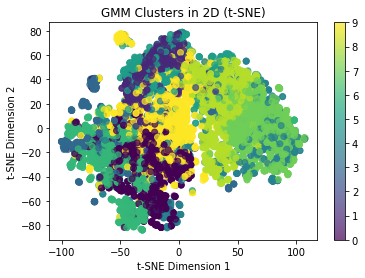

In [26]:
# how do we visualize our gmm??? - feature selection (t-sne), then in 2d?


X = selected_data
y = numeric_labels
# Generate some sample data
#np.random.seed(42)
#X, y = make_blobs(n_samples=300, centers=3, random_state=42)

# Fit a Gaussian Mixture Model
#gmm = GaussianMixture(n_components=3, random_state=42)
#gmm.fit(X)

# Reduce dimensionality with t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)




In [ ]:
# Visualize the GMM clusters in 2D
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=gmm.predict(X), cmap='viridis', marker='o', alpha=0.7)
plt.title('GMM Clusters in 2D (t-SNE)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar()
plt.show()

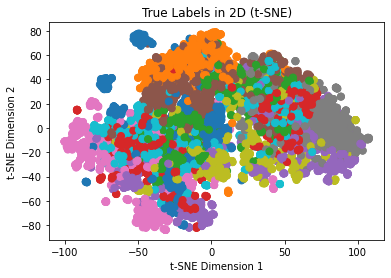

In [22]:

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', marker='o', s=50)
plt.title('True Labels in 2D (t-SNE)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

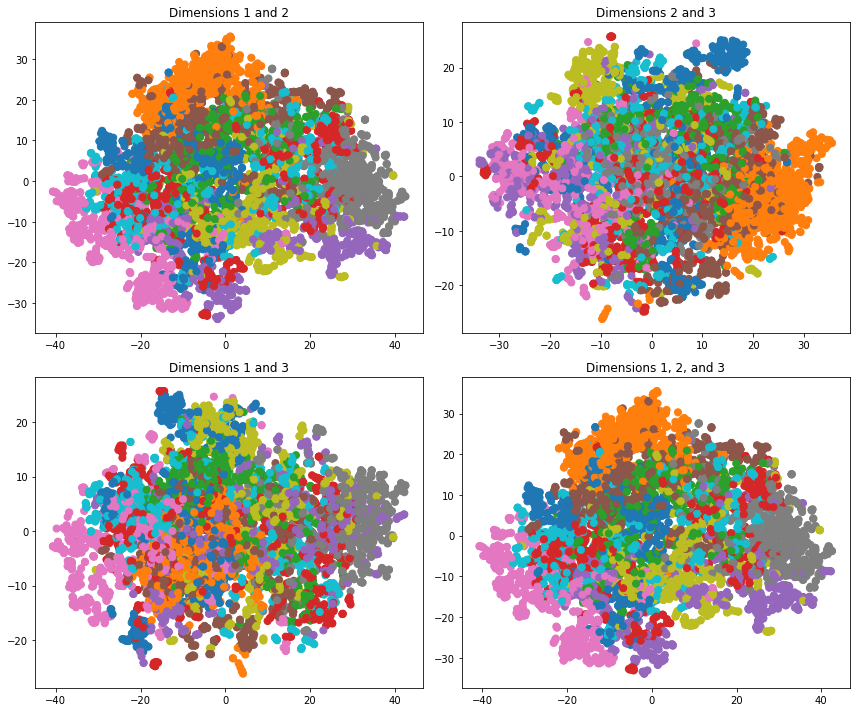

In [23]:
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot for the first two dimensions
axes[0, 0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', marker='o', s=50)
axes[0, 0].set_title('Dimensions 1 and 2')

# Plot for the second and third dimensions
axes[0, 1].scatter(X_tsne[:, 1], X_tsne[:, 2], c=y, cmap='tab10', marker='o', s=50)
axes[0, 1].set_title('Dimensions 2 and 3')

# Plot for the first and third dimensions
axes[1, 0].scatter(X_tsne[:, 0], X_tsne[:, 2], c=y, cmap='tab10', marker='o', s=50)
axes[1, 0].set_title('Dimensions 1 and 3')

# Plot for the first three dimensions
axes[1, 1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', marker='o', s=50)
axes[1, 1].set_title('Dimensions 1, 2, and 3')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()